# Explorando os dados

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('cancellation_prediction.csv')

In [3]:
df.columns

Index(['type', 'cancellation', 'days_between_booking_arrival',
       'year_arrival_date', 'month_arrival_date', 'week_number_arrival_date',
       'day_of_month_arrival_date', 'num_weekend_nights',
       'num_workweek_nights', 'num_adults', 'num_children', 'num_babies',
       'breakfast', 'country', 'market_segment', 'distribution_channel',
       'repeated_guest', 'num_previous_cancellations', 'num_previous_stays',
       'reserved_room', 'changes_between_booking_arrival', 'deposit_policy',
       'id_travel_agency_booking', 'id_person_booking', 'customer_type',
       'avg_price', 'required_car_parking_spaces',
       'total_of_special_requests'],
      dtype='object')

In [4]:
df.head()

,type,cancellation,days_between_booking_arrival,year_arrival_date,month_arrival_date,week_number_arrival_date,day_of_month_arrival_date,num_weekend_nights,num_workweek_nights,num_adults,...,num_previous_stays,reserved_room,changes_between_booking_arrival,deposit_policy,id_travel_agency_booking,id_person_booking,customer_type,avg_price,required_car_parking_spaces,total_of_special_requests
0,Fancy Hotel,0,342,2015,July,27,1,0,0,2,...,0,C,3,No Deposit,NaN,NaN,0,0.0,0,0
1,Fancy Hotel,0,737,2015,July,27,1,0,0,2,...,0,C,4,No Deposit,NaN,NaN,0,0.0,0,0
2,Fancy Hotel,0,7,2015,July,27,1,0,1,1,...,0,A,0,No Deposit,NaN,NaN,0,75.0,0,0
3,Fancy Hotel,0,13,2015,July,27,1,0,1,1,...,0,A,0,No Deposit,304.0,NaN,0,75.0,0,0
4,Fancy Hotel,0,14,2015,July,27,1,0,2,2,...,0,A,0,No Deposit,240.0,NaN,0,98.0,0,1


In [5]:
df.describe()

,cancellation,days_between_booking_arrival,year_arrival_date,week_number_arrival_date,day_of_month_arrival_date,num_weekend_nights,num_workweek_nights,num_adults,num_children,num_babies,...,repeated_guest,num_previous_cancellations,num_previous_stays,changes_between_booking_arrival,id_travel_agency_booking,id_person_booking,customer_type,avg_price,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,...,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,...,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,0.469512,101.718744,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,...,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,0.836030,47.823771,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,...,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,3.000000,300.000000,8.000000,5.000000


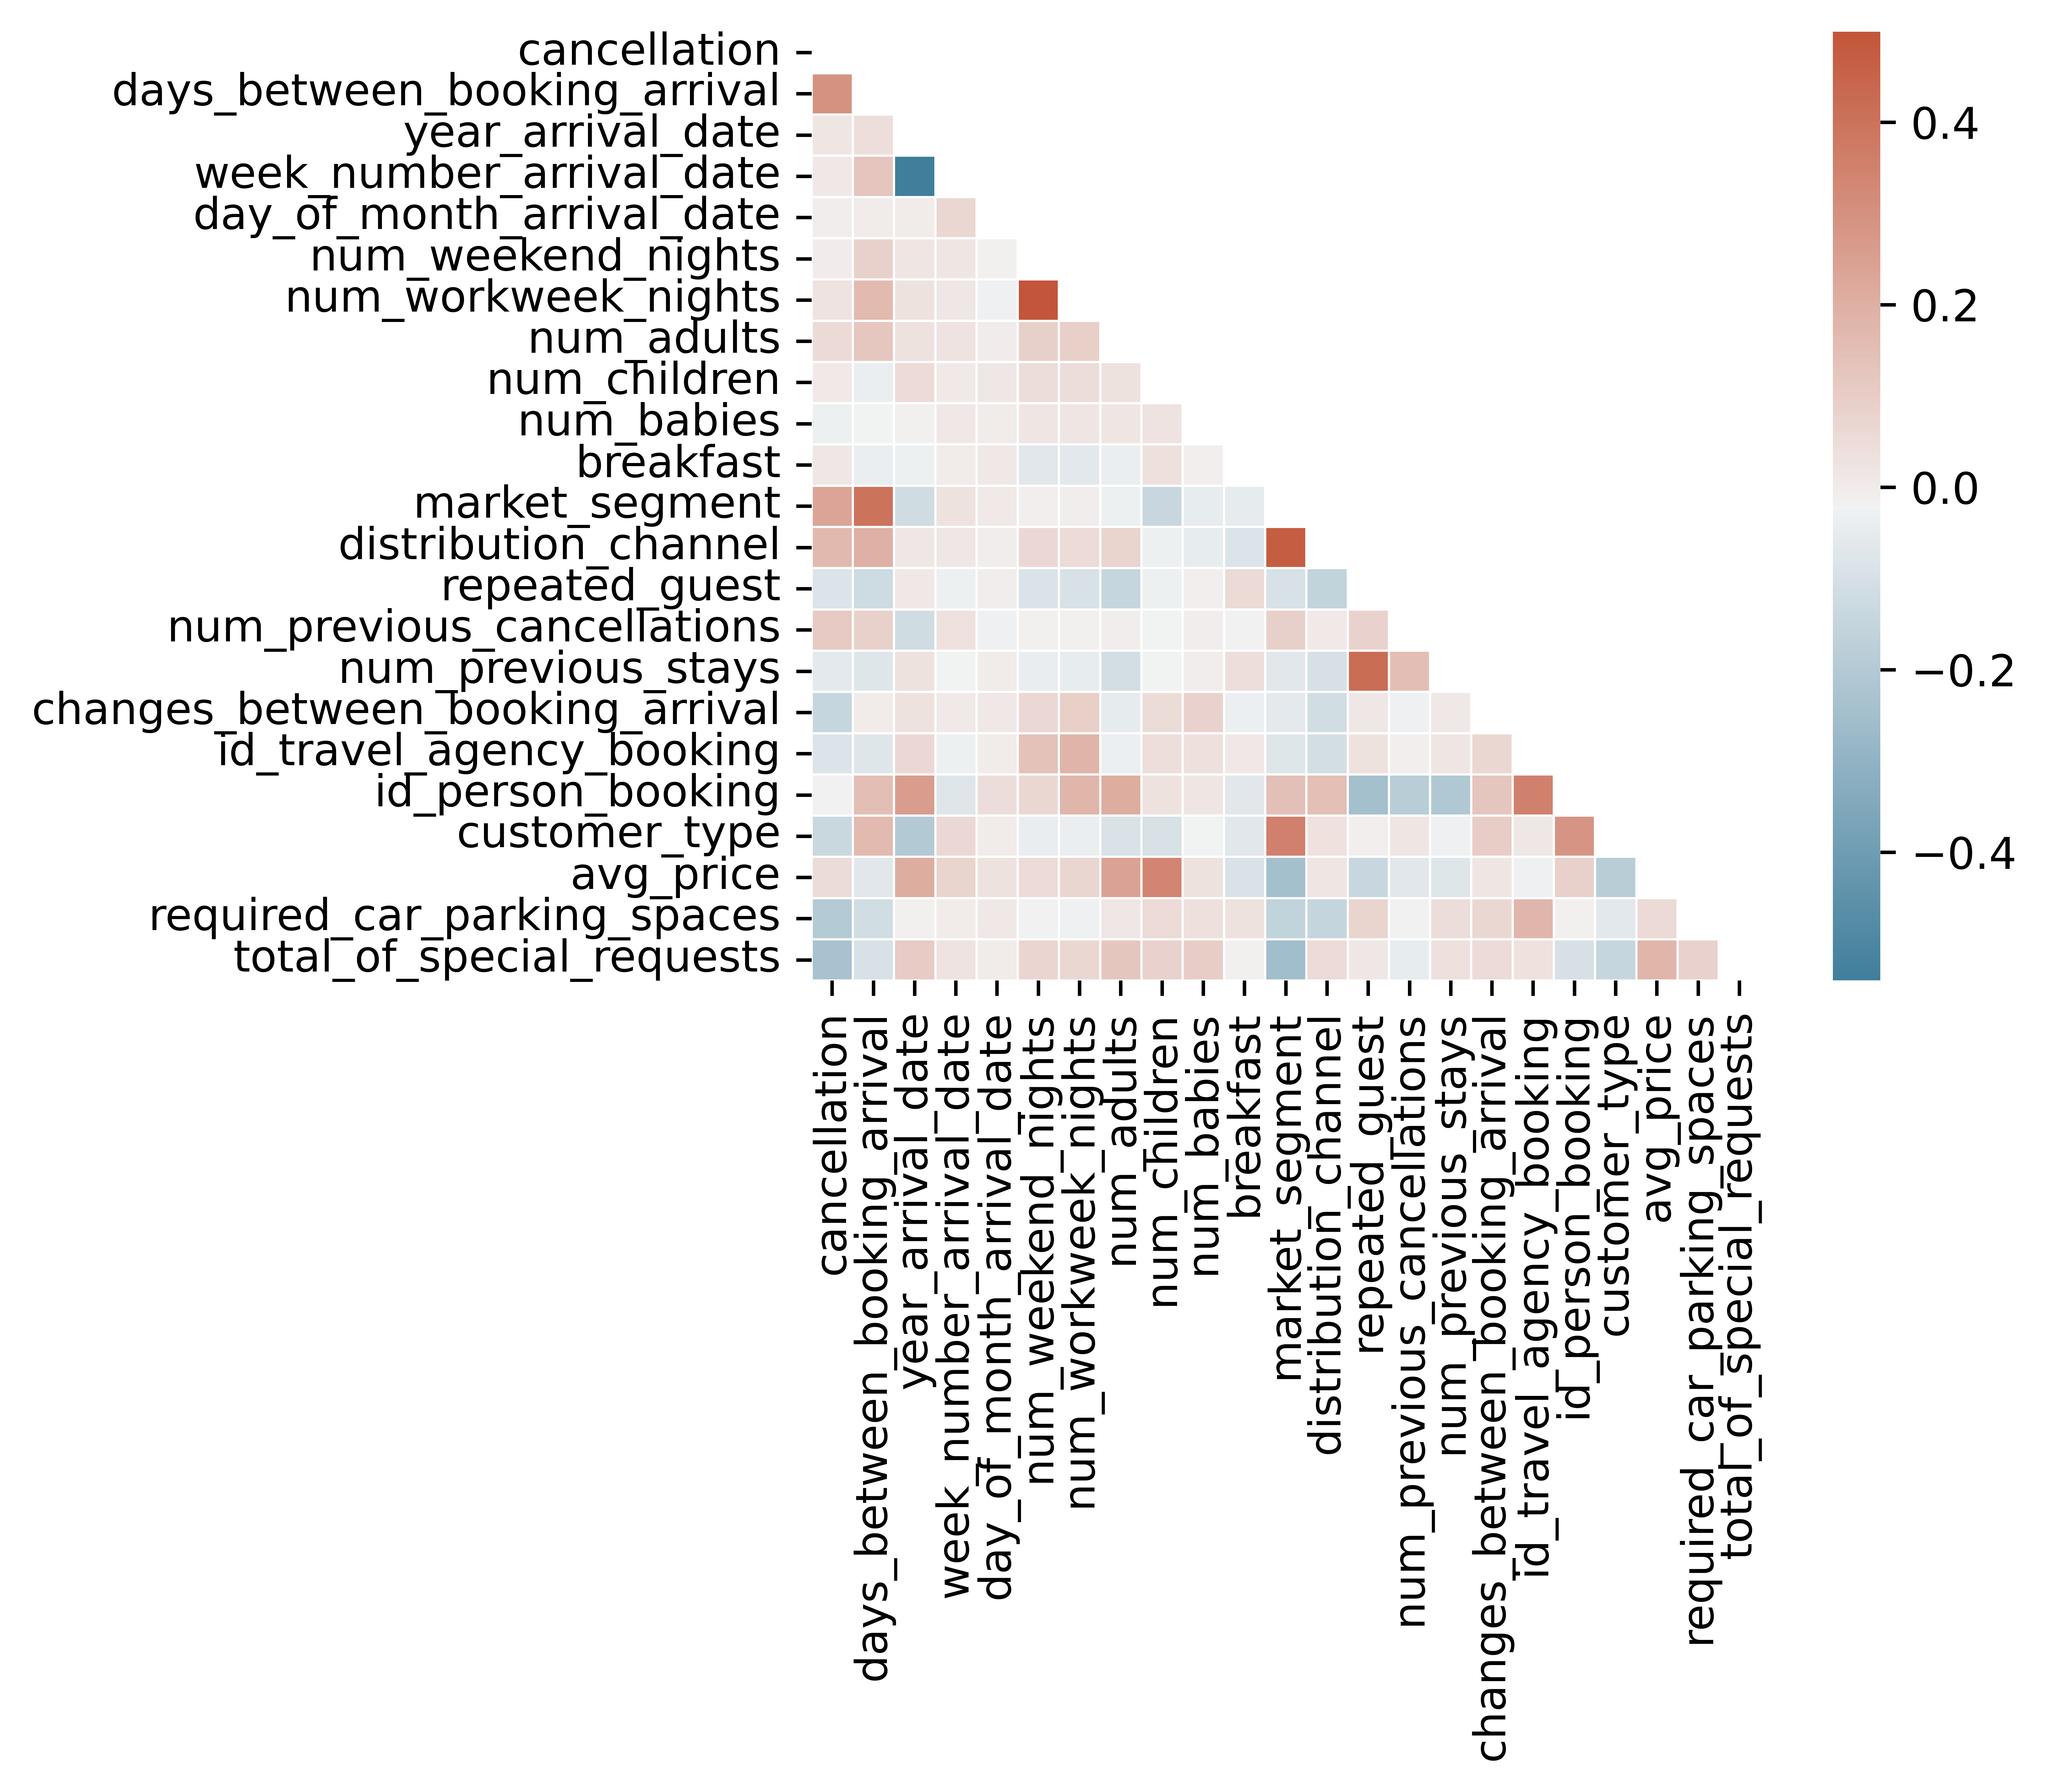

In [14]:
corr = df.corr()

sns.heatmap(
    data=corr,
    mask=np.triu(np.ones_like(corr, dtype=bool)),
    cmap=sns.diverging_palette(230, 20, as_cmap=True, center='light'),
    square=True,
    linewidths=.5,
    xticklabels=True,
    yticklabels=True,
)
plt.rcParams['figure.dpi'] = 1000

<AxesSubplot:>

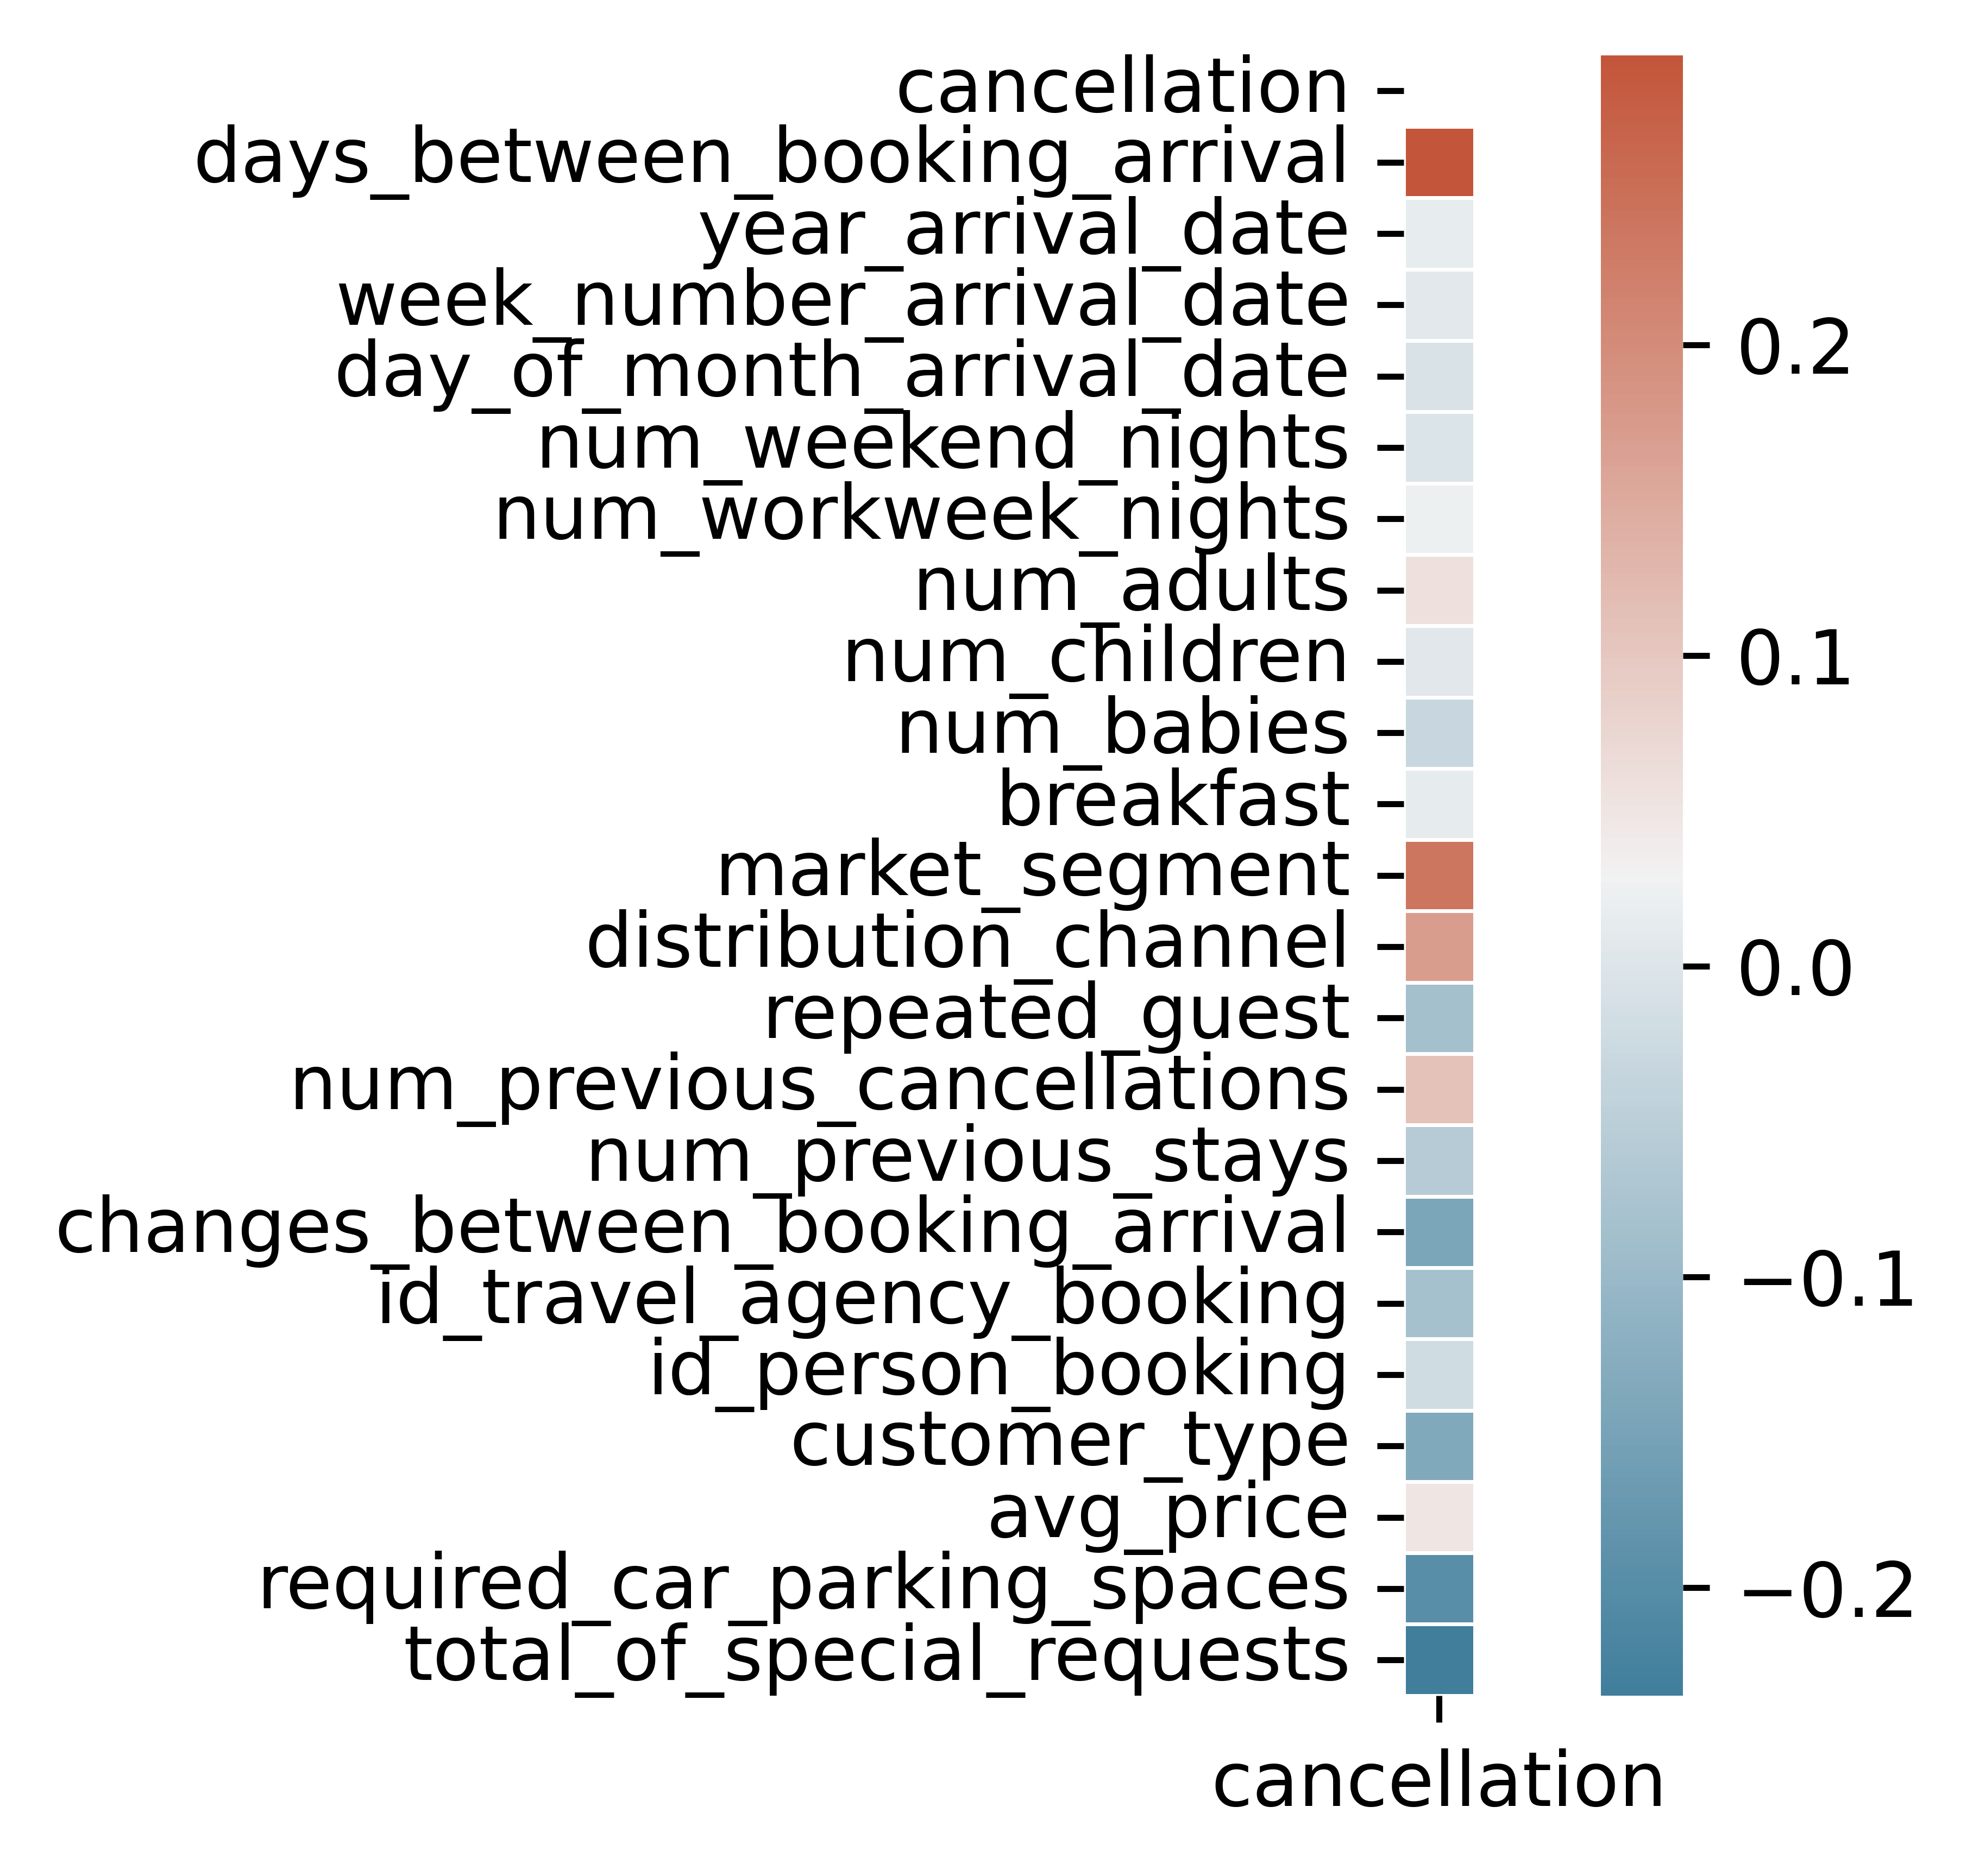

In [15]:
sns.heatmap(
    data=corr[['cancellation']],
    mask=np.triu(np.ones_like(corr[['cancellation']], dtype=bool)),
    cmap=sns.diverging_palette(230, 20, as_cmap=True, center='light'),
    square=True,
    linewidths=.5,
    xticklabels=True,
    yticklabels=True,
)

In [26]:
df.corr()

,cancellation,days_between_booking_arrival,year_arrival_date,week_number_arrival_date,day_of_month_arrival_date,num_weekend_nights,num_workweek_nights,num_adults,num_children,num_babies,...,repeated_guest,num_previous_cancellations,num_previous_stays,changes_between_booking_arrival,id_travel_agency_booking,id_person_booking,customer_type,avg_price,required_car_parking_spaces,total_of_special_requests
cancellation,1.000000,0.293123,0.016660,0.008148,-0.006130,-0.001791,0.024765,0.060017,0.005048,-0.032491,...,-0.084793,0.110133,-0.057358,-0.144381,-0.083114,-0.020642,-0.135819,0.049277,-0.195498,-0.234658
days_between_booking_arrival,0.293123,1.000000,0.040142,0.126871,0.002268,0.085671,0.165799,0.119519,-0.037622,-0.020915,...,-0.124410,0.086042,-0.073548,0.000149,-0.069741,0.151464,0.162524,-0.065567,-0.116451,-0.095712
year_arrival_date,0.016660,0.040142,1.000000,-0.540561,-0.000221,0.021497,0.030883,0.029635,0.054624,-0.013192,...,0.010341,-0.119822,0.029218,0.030872,0.063457,0.259095,-0.199555,0.207913,-0.013684,0.108531
week_number_arrival_date,0.008148,0.126871,-0.540561,1.000000,0.066809,0.018208,0.015558,0.025909,0.005518,0.010395,...,-0.030131,0.035501,-0.020904,0.005508,-0.031201,-0.076760,0.063675,0.080316,0.001920,0.026149
day_of_month_arrival_date,-0.006130,0.002268,-0.000221,0.066809,1.000000,-0.016354,-0.028174,-0.001566,0.014544,-0.000230,...,-0.006145,-0.027011,-0.000300,0.010613,0.001487,0.044858,0.003114,0.030857,0.008683,0.003062
num_weekend_nights,-0.001791,0.085671,0.021497,0.018208,-0.016354,1.000000,0.498969,0.091871,0.045793,0.018483,...,-0.087239,-0.012775,-0.042715,0.063281,0.140739,0.066749,-0.042925,0.052624,-0.018554,0.072671
num_workweek_nights,0.024765,0.165799,0.030883,0.015558,-0.028174,0.498969,1.000000,0.092976,0.044203,0.020191,...,-0.097245,-0.013992,-0.048743,0.096209,0.182382,0.182211,-0.037803,0.069166,-0.024859,0.068192
num_adults,0.060017,0.119519,0.029635,0.025909,-0.001566,0.091871,0.092976,1.000000,0.030447,0.018146,...,-0.146426,-0.006738,-0.107983,-0.051673,-0.035594,0.207793,-0.093755,0.242301,0.014785,0.122884
num_children,0.005048,-0.037622,0.054624,0.005518,0.014544,0.045793,0.044203,0.030447,1.000000,0.024030,...,-0.032859,-0.024730,-0.021072,0.048949,0.041066,0.030931,-0.096125,0.339741,0.056253,0.081745
num_babies,-0.032491,-0.020915,-0.013192,0.010395,-0.000230,0.018483,0.020191,0.018146,0.024030,1.000000,...,-0.008943,-0.007501,-0.006550,0.083440,0.036184,0.019206,-0.022268,0.030870,0.037383,0.097889


In [30]:
corr['cancellation'].sort_values(ascending=True)

total_of_special_requests         -0.234658
required_car_parking_spaces       -0.195498
changes_between_booking_arrival   -0.144381
customer_type                     -0.135819
repeated_guest                    -0.084793
id_travel_agency_booking          -0.083114
num_previous_stays                -0.057358
num_babies                        -0.032491
id_person_booking                 -0.020642
day_of_month_arrival_date         -0.006130
num_weekend_nights                -0.001791
num_children                       0.005048
week_number_arrival_date           0.008148
breakfast                          0.013124
year_arrival_date                  0.016660
num_workweek_nights                0.024765
avg_price                          0.049277
num_adults                         0.060017
num_previous_cancellations         0.110133
distribution_channel               0.169727
market_segment                     0.238335
days_between_booking_arrival       0.293123
cancellation                    

In [36]:
[ x for x in df.columns if x not in corr.columns ]

['type',
 'month_arrival_date',
 'country',
 'reserved_room',
 'deposit_policy',
 'year_week']

## Explorando `type`

In [16]:
df.type.unique()

array(['Fancy Hotel', 'Hotel'], dtype=object)

In [17]:
df.query("type == 'Hotel'").describe()

,cancellation,days_between_booking_arrival,year_arrival_date,week_number_arrival_date,day_of_month_arrival_date,num_weekend_nights,num_workweek_nights,num_adults,num_children,num_babies,...,repeated_guest,num_previous_cancellations,num_previous_stays,changes_between_booking_arrival,id_travel_agency_booking,id_person_booking,customer_type,avg_price,required_car_parking_spaces,total_of_special_requests
count,79330.000000,79330.000000,79330.000000,79330.000000,79330.000000,79330.000000,79330.000000,79330.000000,79326.000000,79330.000000,...,79330.000000,79330.000000,79330.000000,79330.000000,71199.000000,3689.000000,79330.000000,79330.000000,79330.000000,79330.000000
mean,0.417270,109.735724,2016.174285,27.177449,15.786625,0.795185,2.182957,1.850977,0.091370,0.004941,...,0.025615,0.079743,0.132371,0.187369,28.144721,145.271618,0.477058,105.223555,0.024367,0.546918
std,0.493111,110.948526,0.699181,13.398523,8.728451,0.885026,1.456416,0.509292,0.372177,0.084323,...,0.157983,0.415472,1.693411,0.608620,56.432181,119.774134,0.841800,39.249485,0.154919,0.780776
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,8.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,23.000000,2016.000000,17.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,9.000000,40.000000,0.000000,79.200000,0.000000,0.000000
50%,0.000000,74.000000,2016.000000,27.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,9.000000,91.000000,0.000000,99.900000,0.000000,0.000000
75%,1.000000,163.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,17.000000,219.000000,1.000000,126.000000,0.000000,1.000000
max,1.000000,629.000000,2017.000000,53.000000,31.000000,16.000000,41.000000,4.000000,3.000000,10.000000,...,1.000000,21.000000,72.000000,21.000000,509.000000,497.000000,3.000000,300.000000,3.000000,5.000000


In [18]:
df.query("type == 'Fancy Hotel'").describe()

,cancellation,days_between_booking_arrival,year_arrival_date,week_number_arrival_date,day_of_month_arrival_date,num_weekend_nights,num_workweek_nights,num_adults,num_children,num_babies,...,repeated_guest,num_previous_cancellations,num_previous_stays,changes_between_booking_arrival,id_travel_agency_booking,id_person_booking,customer_type,avg_price,required_car_parking_spaces,total_of_special_requests
count,40060.000000,40060.000000,40060.000000,40060.000000,40060.000000,40060.000000,40060.000000,40060.000000,40060.000000,40060.000000,...,40060.000000,40060.000000,40060.000000,40060.000000,31851.000000,3108.000000,40060.000000,40060.000000,40060.000000,40060.00000
mean,0.277634,92.675686,2016.121443,27.140864,15.821243,1.189815,3.128732,1.867149,0.128682,0.013904,...,0.044383,0.101722,0.146455,0.287968,217.571725,241.486165,0.454568,94.778238,0.138068,0.61977
std,0.447837,97.285315,0.722347,14.005441,8.883708,1.147812,2.461329,0.697285,0.445195,0.118998,...,0.205948,1.335115,1.001955,0.726548,88.264489,125.930668,0.824291,60.771291,0.351001,0.81393
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,0.000000,0.000000,0.00000
25%,0.000000,10.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,240.000000,154.000000,0.000000,50.000000,0.000000,0.00000
50%,0.000000,57.000000,2016.000000,28.000000,16.000000,1.000000,3.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,240.000000,223.000000,0.000000,75.000000,0.000000,0.00000
75%,1.000000,155.000000,2017.000000,38.000000,24.000000,2.000000,5.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,242.000000,330.000000,0.000000,125.000000,0.000000,1.00000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,2.000000,...,1.000000,26.000000,30.000000,17.000000,535.000000,543.000000,3.000000,300.000000,8.000000,5.00000


- Média de cancelamento é maior com `type=Hotel` (.42) do que `type=Fancy Hotel` (.28)

In [19]:
pd.get_dummies(data=df, columns=['type'], drop_first=True)[['cancellation', 'type_Hotel']].corr()

,cancellation,type_Hotel
cancellation,1.000000,0.136531
type_Hotel,0.136531,1.000000


## Explorando Year

In [20]:
df.groupby('year_arrival_date').agg(['count', 'mean'])

/tmp/ipykernel_66815/241084038.py:1: FutureWarning: ['type', 'month_arrival_date', 'country', 'reserved_room', 'deposit_policy'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  df.groupby('year_arrival_date').agg(['count', 'mean'])


cancellation           days_between_booking_arrival  \
                         count      mean                        count   
year_arrival_date                                                       
2015                     21996  0.370158                        21996   
2016                     56707  0.358633                        56707   
2017                     40687  0.386979                        40687   

                              week_number_arrival_date             \
                         mean                    count       mean   
year_arrival_date                                                   
2015                97.245999                    21996  39.618976   
2016               102.870369                    56707  28.458162   
2017               109.259223                    40687  18.630373   

                  day_of_month_arrival_date            num_weekend_nights  \
                                      count       mean              count   
year_arrival_date                                                           
2015                                  21996  15.656483              21996   
2016                                  56707  15.911104              56707   
2017                                  40687  15.717576              40687   

                             ... id_person_booking            customer_type  \
                       mean  ...             count       mean         count   
year_arrival_date            ...                                              
2015               0.929714  ...              1305  151.66590         21996   
2016               0.893981  ...              3182  168.07731         56707   
2017               0.973308  ...              2310  239.69697         40687   

                            avg_price             required_car_parking_spaces  \
                       mean     count        mean                       count   
year_arrival_date                                                               
2015               0.848518     21996   87.167604                       21996   
2016               0.423986     56707   98.196851                       56707   
2017               0.328065     40687  114.493903                       40687   

                            total_of_special_requests            
                       mean                     count      mean  
year_arrival_date                                                
2015               0.061466                     21996  0.435443  
2016               0.068334                     56707  0.548645  
2017               0.054981                     40687  0.676506  

[3 rows x 44 columns]

- Baixa variação de cancelamentos entres os anos apresentados

## Explorando `week_number`

In [21]:
df['year_week'] = df['year_arrival_date'].astype(str) + '_' + df['week_number_arrival_date'].astype(str)

In [22]:
df.groupby('year_week').agg(['count', 'mean'])['cancellation']

/tmp/ipykernel_66815/3740843541.py:1: FutureWarning: ['type', 'month_arrival_date', 'country', 'reserved_room', 'deposit_policy'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  df.groupby('year_week').agg(['count', 'mean'])['cancellation']


,count,mean
year_week,,
2015_27,359,0.384401
2015_28,485,0.414433
2015_29,693,0.454545
2015_30,770,0.512987
2015_31,579,0.449050
...,...,...
2017_5,818,0.320293
2017_6,812,0.294335
2017_7,1160,0.337069
